## Classification

Labeled Faces in the Wild

In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
lfw.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [4]:
X = lfw.data
y = lfw.target

img_height = lfw.images.shape[1]
img_width = lfw.images.shape[2]
print('height', img_height, 'width', img_width)

height 50 width 37


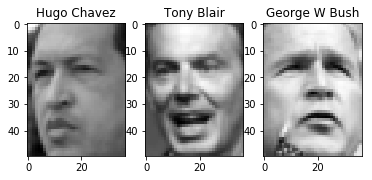

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax.flatten()

for i in range(3):
    ax[i].imshow(lfw.images[i], cmap='gray')
    ax[i].set_title(lfw.target_names[lfw.target[i]])

(1288, 2)
(77,) (77,)
(236,) (236,)
0 Ariel Sharon
1 Colin Powell
2 Donald Rumsfeld
3 George W Bush
4 Gerhard Schroeder
5 Hugo Chavez
6 Tony Blair


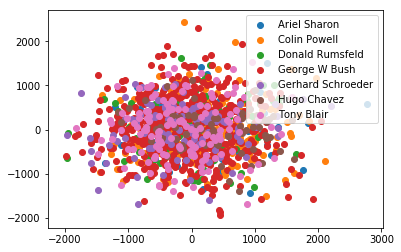

In [6]:
# plot the pixels reduced to 2-d and then colour code based
# on person
pca = PCA(n_components=2)

Z = pca.fit_transform(X) # Z is 2-D
print(Z.shape)

# all the rows for Ariel Sharon
print(Z[y==0, 0].shape, Z[y==0, 1].shape)
print(Z[y==1, 0].shape, Z[y==1, 1].shape)

# plot Z[0] vs Z[1], with colouring for each person
fig, ax = plt.subplots()

for i in range(len(lfw.target_names)):
    print(i, lfw.target_names[i])
    # scatter plot each target's subset of Z
    ax.scatter(Z[y==i, 0], Z[y==i, 1], label=lfw.target_names[i])

ax.legend()

0 Donald Rumsfeld
1 Colin Powell


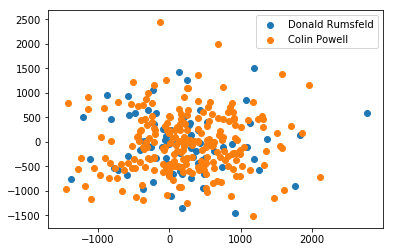

In [7]:
# plot only 2 people
%matplotlib inline

fig, ax = plt.subplots()

people = ['Donald Rumsfeld', 'Colin Powell']

for i in range(len(people)):
    print(i, people[i])
    # scatter plot each target's subset of Z
    ax.scatter(Z[y==i, 0], Z[y==i, 1], label=people[i])

ax.legend()

[Text(0, 0.5, 'cumulative explained variance'),
 Text(0.5, 0, 'k'),
 Text(0.5, 1.0, 'PCA explained variance')]

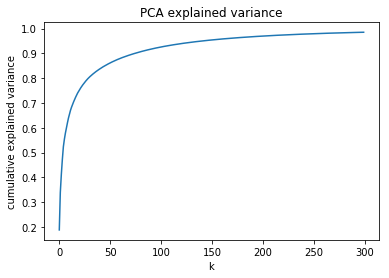

In [8]:
# look at explained variance for up to k=300
pca = PCA(n_components=300)

pca.fit(lfw.data)

# cumulative sum of the variances [v1, v2, v3, ...]
# [v1, v1+v2, v1+v2+v3, ....]

fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_.cumsum())
ax.set(title='PCA explained variance', xlabel='k',
       ylabel='cumulative explained variance')

## Logistic Regression with Gradient Descent

- cross validation
- learning curve

In [9]:
from sklearn.linear_model import SGDClassifier

# For best results using the default learning rate schedule,
# the data should have zero mean and unit variance.

# train-test-split first so that we can fit X_scaler using
# only training set (otherwise test set can corrupt scaler)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scale X (2 steps: fit, transform)
X_scaler = StandardScaler()
X_scaler.fit(X_train) # Note: NOT X_scaler.fit(X) which includes X_test!

Z_train = X_scaler.transform(X_train)
Z_test = X_scaler.transform(X_test)

# If you choose to do PCA, here's where you can add it
# to reduce 1850 dimensions to e.g. 300

In [10]:
# cross validation
model = SGDClassifier(max_iter=1000, tol=1e-3)

scores = cross_validate(model, Z_train, y_train, cv=5,
                        return_train_score=True, return_estimator=True)

# Note: 'test_score' is actually the validation_score
# we didn't use X_test or y_test in cross_validate?
scores

{'fit_time': array([0.44864607, 0.58500934, 0.46662354, 0.64223576, 0.50327969]),
 'score_time': array([0.01403618, 0.00300932, 0.00300741, 0.00301027, 0.00300884]),
 'estimator': (SGDClassifier(alpha=0.0001, average=False, class_weight=None,
         early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
         l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
         n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
         power_t=0.5, random_state=None, shuffle=True, tol=0.001,
         validation_fraction=0.1, verbose=0, warm_start=False),
  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
         early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
         l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
         n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
         power_t=0.5, random_state=None, shuffle=True, tol=0.001,
         validation_fraction=0.1, verbose=0, warm_start

In [11]:
train_sizes, train_scores, val_scores = learning_curve(model, 
                                                       Z_train,
                                                       y_train,
                                                       cv=3)

In [12]:
# accuracy scores on val show a slight overfitting
# last score went down from 0.813 to 0.807
#
# Note: R2 does not apply here because this is a classification
# model / problem (R2 is only for regression)
val_scores.mean(axis=1) 

array([0.46239407, 0.6573103 , 0.75682041, 0.78260531, 0.79502875])

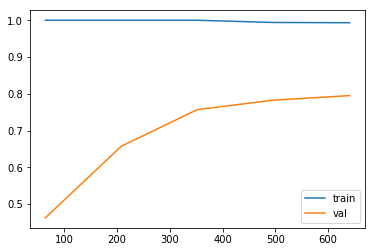

In [13]:
# plot average (over 3-folds) train_scores vs. train_sizes
# plot average (over 3-folds) val_scores vs. train_sizes

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores.mean(axis=1), label='train')
ax.plot(train_sizes, val_scores.mean(axis=1), label='val')
ax.legend()

## Support Vector Machine (SVM)

- cross validation
- learning curve

In [14]:
from sklearn.svm import SVC

model_svc = SVC(gamma='auto')
scores = cross_validate(model_svc, Z_train, y_train, cv=5,
                        return_train_score=True,
                        return_estimator=True)
scores

{'fit_time': array([2.27949381, 2.70572257, 3.73224831, 2.43935513, 2.20846963]),
 'score_time': array([0.43253088, 0.40225983, 0.38881755, 0.43054891, 0.34703994]),
 'estimator': (SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),
  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),
  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),
  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', k

In [15]:
# How to get the best estimator from the above scores
best_estimator = scores['estimator'][2]

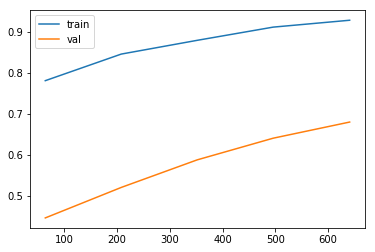

In [16]:
train_sizes, train_scores, val_scores = learning_curve(model_svc, 
                                                       Z_train,
                                                       y_train,
                                                       cv=3)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores.mean(axis=1), label='train')
ax.plot(train_sizes, val_scores.mean(axis=1), label='val')
ax.legend()

In [17]:
val_scores.mean(axis=1)

array([0.44621459, 0.52062794, 0.58794852, 0.6408043 , 0.6802211 ])

In [18]:
train_scores.mean(axis=1)

array([0.78125   , 0.84615385, 0.87973485, 0.91196237, 0.92875715])

Generally SVC or SVR (Classifier and Regressor) for SVM need to be tuned
using GridSearchCV.

Parameters: C and gamma are constants, so usually have to find the
right values. (Unlike learning rate which is already dynamic)

In [19]:
from sklearn.model_selection import GridSearchCV

model_svc = SVC()

# Caution: SVC runs very slowly, so we only
# do a subset
# params = {
#    'C': [0.01, 0.1, 1.0, 10],
#    'gamma': [0.001, 0.01, 0.1, 1.0]
#}

params = {
    'C': [0.01, 0.1, 1.0, 10],
    'gamma': [0.001, 0.01, 0.1]
}

gs = GridSearchCV(model_svc, params, cv=3)
gs.fit(Z_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'C': 10, 'gamma': 0.001}
0.7163561076604554
